# Healthcare RSI Statistical significance
## Null Hypothesis 1 - The RSI of the heathcare fund, XLV, is the same as the RSI for the S&P 500
## Alternative Hypothesis 1 - The RSI of the heathcare fund, XLV, is different from the RSI for the S&P 500

In [73]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.power import zt_ind_solve_power

key_alphavantage = '9HXBL1MHLXSUW3XP'
function = 'RSI'
interval = 'daily'

In [2]:
symbol1 = 'XLV'

response = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol1}&interval={interval}&time_period=10&series_type=open&apikey={key_alphavantage}')
response = response.json()

In [3]:
symbol2 = '.INX'

response2 = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol2}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')
response2 = response2.json()

In [4]:
l_keys = list(response[f'Technical Analysis: {function}'].keys())
l_keys = l_keys[1:]

In [5]:
l_keys2 = list(response2[f'Technical Analysis: {function}'].keys())
l_keys2 = l_keys2[1:]

In [6]:
date_rsi = {}

count = 0
for i in l_keys:
    rsi = response[f'Technical Analysis: {function}'][i][f'{function}']
    count += 1
    date_rsi[f'{i}'] = float(rsi)

In [7]:
date_rsi2 = {}

count2 = 0 
for i in l_keys2:
    rsi2 = response2[f'Technical Analysis: {function}'][i][f'{function}']
    count2 += 1
    date_rsi2[f'{i}'] = float(rsi2)

In [8]:
df = pd.DataFrame(date_rsi.items(), columns = ['date', f'{function}'])

In [9]:
df2 = pd.DataFrame(date_rsi2.items(), columns = ['date', f'{function}'])

In [10]:
year = [int(l_keys[i].split('-')[0]) for i in range(len(l_keys))]
month = [int(l_keys[i].split('-')[1]) for i in range(len(l_keys))]
day = [int(l_keys[i].split('-')[2]) for i in range(len(l_keys))]

In [11]:
year2 = [int(l_keys2[i].split('-')[0]) for i in range(len(l_keys2))]
month2 = [int(l_keys2[i].split('-')[1]) for i in range(len(l_keys2))]
day2 = [int(l_keys2[i].split('-')[2]) for i in range(len(l_keys2))]

In [12]:
df['year'] = year
df['month'] = month
df['day'] = day

In [13]:
df2['year'] = year2
df2['month'] = month2
df2['day'] = day2

In [14]:
df_2019 = df.loc[df['year'] == 2019]
df_2018 = df.loc[df['year'] == 2018]
df_2017 = df.loc[df['year'] == 2017]

df171819 = df.loc[df['year'] >= 2017]


df2_2019 = df2.loc[df2['year'] == 2019]
df2_2018 = df2.loc[df2['year'] == 2018]
df2_2017 = df2.loc[df2['year'] == 2017]

df2_171819_2 = df2.loc[df2['year'] >= 2017]

## Comparing the normalized RSI data for XLV and S&P500 

### 2019 exclusive data

In [15]:
sample_means19 = []
sample_means19_2 = []

for i in range(20000):
    sample19 = df_2019.sample(n=50, random_state=i) 
    sample_means19.append(sample19.RSI.mean())
    
    sample19_2 = df2_2019.sample(n=50, random_state=i) 
    sample_means19_2.append(sample19_2.RSI.mean())

### Evaluating z - score and statistical significance

In [26]:
xlv_bar19 = df_2019.RSI.mean()  ### xlv population mean (subset)
sp500_bar19 = df2_2019.RSI.mean() ### S&P500 population mean (universal population)

stan_dev19 = np.std(df2_2019.RSI) ### S&P500 population standard dev
stan_err19 = stan_dev19/np.sqrt(len(df2_2019))
z_score19 = (xlv_bar19 - sp500_bar19) / (stan_dev19/np.sqrt(len(df2_2019)))

print(f'The z_score is: {z_score19}')
p_val19 = stats.norm.cdf(z_score19)

print(f'The p-value is: {p_val19}')
print(f'The standard deviation is {stan_dev19}')
print(f'The standard error is {stan_err19}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -4.802286928563092
The p-value is: 7.843184929560418e-07
The standard deviation is 13.701037932442613
The standard error is 0.8899780503296061


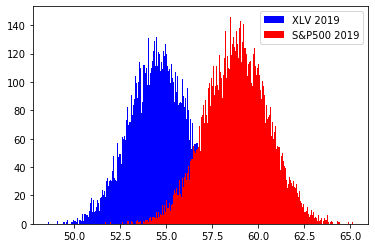

In [27]:
plt.hist(sample_means19, bins=500, color='blue', label='XLV 2019');
plt.hist(sample_means19_2, bins=500, color='red', label='S&P500 2019');
plt.legend();

### 2018 Exclusive

In [28]:
sample_means18 = []
sample_means18_2 = []
for i in range(20000):
    sample18 = df_2018.sample(n=50, random_state=i) 
    sample_means18.append(sample18.RSI.mean()) 
    
    sample18_2 = df2_2018.sample(n=50, random_state=i) 
    sample_means18_2.append(sample18_2.RSI.mean()) 

In [30]:
xlv_bar18 = df_2018.RSI.mean()  ### xlv population mean (subset)
sp500_bar18 = df2_2018.RSI.mean() ### S&P500 population mean (universal population)

stan_dev18 = np.std(df2_2018.RSI) ### S&P500 population standard dev
stan_err18 = stan_dev18/np.sqrt(len(df2_2018))
z_score18 = (xlv_bar18 - sp500_bar18) / stan_err18

print(f'The z_score is: {z_score18}')
#p_val18 = stats.norm.cdf(z_score18)   ### Survival function - since the sample distribution is to the right of the population
p_val18 = stats.norm.sf(z_score18)
print(f'The p-value is: {p_val18}')
print(f'The standard deviation is {stan_dev18}')
print(f'The standard error is {stan_err18}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: 2.699868731842883
The p-value is: 0.0034683419823887565
The standard deviation is 15.747675009726795
The standard error is 0.9939844327942696


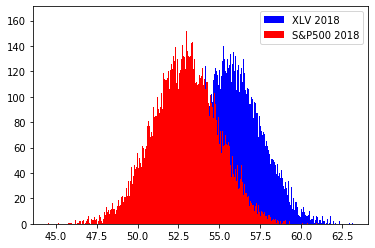

In [21]:
plt.hist(sample_means18, bins=500, color='blue', label = 'XLV 2018');
plt.hist(sample_means18_2, bins=500, color='red', label= 'S&P500 2018');
plt.legend();

### 2017 Exclusive

In [22]:
sample_means17 = []
sample_means17_2 = []
for i in range(20000):
    sample17 = df_2017.sample(n=50, random_state=i) 
    sample_means17.append(sample17.RSI.mean()) 
    
    sample17_2 = df2_2017.sample(n=50, random_state=i) 
    sample_means17_2.append(sample17_2.RSI.mean()) 

In [32]:
xlv_bar17 = df_2017.RSI.mean()  ### xlv population mean (subset)
sp500_bar17 = df2_2017.RSI.mean() ### S&P500 population mean (universal population)

stan_dev17 = np.std(df2_2017.RSI) ### S&P500 population standard dev
stan_err17 = stan_dev17/np.sqrt(len(df2_2017))
z_score17 = (xlv_bar17 - sp500_bar17) / stan_err17

print(f'The z_score is: {z_score17}')
p_val17 = stats.norm.cdf(z_score17)   ### Survival function - since the sample distribution is to the right of the population
#p_val17 = stats.norm.sf(z_score17)
print(f'The p-value is: {p_val17}')
print(f'The standard deviation is {stan_dev17}')
print(f'The standard error is {stan_err17}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -5.6241731018342085
The p-value is: 9.319933383486873e-09
The standard deviation is 12.124269743940395
The standard error is 0.7652771204023213


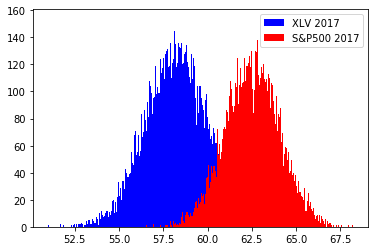

In [41]:
plt.hist(sample_means17, bins=500, color='blue', label='XLV 2017');
plt.hist(sample_means17_2, bins=500, color='red', label='S&P500 2017');
plt.legend();

### 2017 Through 2019 YTD

In [37]:
sample_means171819 = []
sample_means171819_2 = []
for i in range(10000):
    sample171819 = df171819.sample(n=100, random_state=i) 
    sample_means171819.append(sample171819.RSI.mean()) 
    
    sample171819_2 = df2_171819_2.sample(n=50, random_state=i) 
    sample_means171819_2.append(sample171819_2.RSI.mean()) 

In [38]:
xlv_bar171819 = df171819.RSI.mean()  ### xlv population mean (subset)
sp500_bar171819 = df2_171819_2.RSI.mean() ### S&P500 population mean (universal population)

stan_dev171819 = np.std(df2_171819_2.RSI) ### S&P500 population standard dev
stan_err171819 = stan_dev171819/np.sqrt(len(df2_171819_2))
z_score171819 = (xlv_bar171819 - sp500_bar171819) / stan_err171819

print(f'The z_score is: {z_score171819}')
p_val171819 = stats.norm.cdf(z_score171819)   ### Survival function - since the sample distribution is to the right of the population
#p_val171819 = stats.norm.sf(z_score171819)
print(f'The p-value is: {p_val171819}')
print(f'The standard deviation is {stan_dev171819}')
print(f'The standard error is {stan_err171819}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -3.5998293596878983
The p-value is: 0.00015921303737130178
The standard deviation is 14.506961192947019
The standard error is 0.5336471938857916


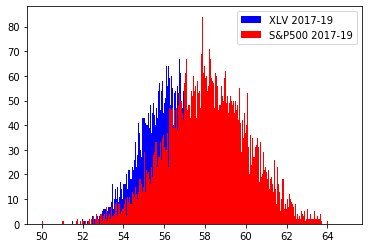

In [39]:
plt.hist(sample_means171819, bins=500, color = 'blue', label='XLV 2017-19');
plt.hist(sample_means171819_2, bins=500, color = 'red', label='S&P500 2017-19');
plt.legend();

### Current RSI & Price

In [51]:
symbol = 'XLV'
function = 'RSI'
xlv_rsi = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')

In [52]:
xlv_rsi = xlv_rsi.json()

In [69]:
xlv_10day = [pair['RSI'] for pair in list(xlv_rsi['Technical Analysis: RSI'].values())[0:11]]
xlv_10day

['66.9611',
 '64.6645',
 '75.9496',
 '75.0204',
 '72.5840',
 '69.1720',
 '62.4232',
 '88.4782',
 '88.1252',
 '87.7885',
 '87.5869']

In [70]:
symbol = '.INX' ### S&P500
function = 'RSI'
sp500_rsi = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')

In [71]:
sp500_rsi = sp500_rsi.json()

In [72]:
sp500_10day = [pair['RSI'] for pair in list(sp500_rsi['Technical Analysis: RSI'].values())[0:11]]
sp500_10day

['59.6041',
 '59.4653',
 '62.6987',
 '60.5482',
 '55.6504',
 '49.9493',
 '43.2213',
 '75.0851',
 '78.1440',
 '77.7296',
 '75.0488']

## Cohen's D and Power

In [78]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

### 2019

In [88]:
cod19 = cohen_d(df_2019['RSI'], df2_2019['RSI'])

In [94]:
n1_19 = len(df_2019['RSI'])
n2_19 = len(df2_2019['RSI'])
ratio = n1_19/n2_19
xlv_19_power = zt_ind_solve_power(effect_size = cod19, nobs1=n1_19, power = None, alpha = .05) 
print(xlv_19_power, cod19)

0.9374536981512285 -0.3209426416799876


This value for power is close to 1, so there is minimal posibility for a Type 2 Error
The cohen's d value is negative

### 2018

In [95]:
cod18 = cohen_d(df_2018['RSI'], df2_2018['RSI'])

In [96]:
n1_18 = len(df_2018['RSI'])
n2_18 = len(df2_2018['RSI'])
ratio = n1_18/n2_18
xlv_18_power = zt_ind_solve_power(effect_size = cod18, nobs1=n1_18, power = None, alpha = .05) 
print(xlv_18_power, cod18)

0.48056801609630434 0.1705931324800668


### 2017

In [98]:
cod17 = cohen_d(df_2017['RSI'], df2_2017['RSI'])

In [99]:
n1_17 = len(df_2017['RSI'])
n2_17 = len(df2_2017['RSI'])
ratio = n1_17/n2_17
xlv_17_power = zt_ind_solve_power(effect_size = cod17, nobs1=n1_17, power = None, alpha = .05) 
print(xlv_17_power, cod17)

0.9574432523182477 -0.3286465159491992


### 2017 - 2019

In [101]:
cod171819 = cohen_d(df171819['RSI'], df2_171819_2['RSI'])

In [102]:
n1_171819 = len(df171819['RSI'])
n2_171819 = len(df2_171819_2['RSI'])
ratio = n1_171819/n2_171819
xlv_171819_power = zt_ind_solve_power(effect_size = cod171819, nobs1=n1_171819, power = None, alpha = .05) 
print(xlv_171819_power, cod171819)

0.7261025565145787 -0.1332312692092586


## Conclusion

This is something!

## Null Hypothesis 2 - The RSI of the 5 largest holdings in the heathcare fund, XLV, is the same as the RSI for the S&P 500
## Alternative Hypothesis 2 - The RSI of the 5 largest holdings in the heathcare fund, XLV, is different from the RSI for the S&P 500